# Convert a RooAbsPdf to a python callable

This is a simple demonstration that the wrapper function `convert_rf_pdf` does what we expect

## Make a dummy RooFit model

In [2]:
import ROOT as r
from ROOT import RooFit as rf

# observable
mass = r.RooRealVar("m", "m", 5000, 5800)

# gaussian
mean = r.RooRealVar("mu", "mu", 5350, 5300, 5400)
sigma = r.RooRealVar("sg", "sg", 25, 0, 100)
spdf = r.RooGaussian("sig", "sig", mass, mean, sigma)

# exponential
slope = r.RooRealVar("lb", "lb", -0.002, -0.01, 0)
bpdf = r.RooExponential("bkg", "bkg", mass, slope)

# total
sy = r.RooRealVar("sy", "sy", 1000, 0, 10000)
by = r.RooRealVar("by", "by", 2000, 0, 10000)
pdf = r.RooAddPdf("pdf", "pdf", r.RooArgList(spdf, bpdf), r.RooArgList(sy, by))

Welcome to JupyROOT 6.22/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



## Plot the dummy RooFit model

[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (sig)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: ()


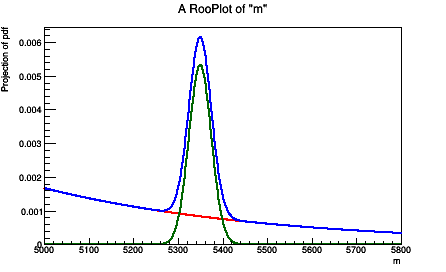

In [3]:
c = r.TCanvas('c','c',450,300)
pl = mass.frame(rf.Bins(800))
pdf.plotOn(
    pl,
    rf.Normalization(1, r.RooAbsReal.NumEvent),
    rf.Precision(-1),
    rf.Components("bkg"),
    rf.LineColor(r.kRed),
    rf.LineStyle(2),
    rf.LineWidth(2)
)
pdf.plotOn(
    pl,
    rf.Normalization(1, r.RooAbsReal.NumEvent),
    rf.Precision(-1),
    rf.Components("sig"),
    rf.LineColor(r.kGreen + 3),
    rf.LineWidth(2)
)
pdf.plotOn(pl, rf.Normalization(1, r.RooAbsReal.NumEvent), rf.Precision(-1), rf.LineWidth(2))
pl.Draw()
c.Draw();

## Convert the RooFit pdfs to python callables

Making use of the `sweights` package wrapper `convert_rf_pdf`

In [4]:
from sweights import convert_rf_pdf

_spdf = convert_rf_pdf(spdf, mass)
_bpdf = convert_rf_pdf(bpdf, mass)
_pdf = convert_rf_pdf(pdf, mass)

## Now draw the python function with matplotlib

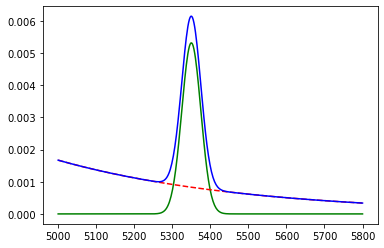

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fs = sy.getVal() / (sy.getVal() + by.getVal())
fb = by.getVal() / (sy.getVal() + by.getVal())

x = np.linspace(mass.getMin(), mass.getMax(), 400)
plt.plot(x, fs * _spdf(x), "g-");
plt.plot(x, fb * _bpdf(x), "r--");
plt.plot(x, _pdf(x), "b-");

Looks ok!